In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import skew
import numpy as np
import joblib


In [2]:
df = pd.read_csv("data/diabetes.csv") #Read in the dataset

In [3]:
df.columns #Get all the names of the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape #Get the number of rows and columns in dataset 

(768, 9)

In [5]:
df.head(10) #Prints out first 10 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.tail(10) #Prints out last 10 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.describe() #Statistics for all the columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isna().sum() #How many missing values there are for each column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
print('Number of duplicate rows:', df.duplicated().sum()) #Check for duplicate rows

Number of duplicate rows: 0


In [10]:
# class distribution
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [11]:
df.iloc[:, :8].corr()
# We use the iloc method to select the first 8 columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


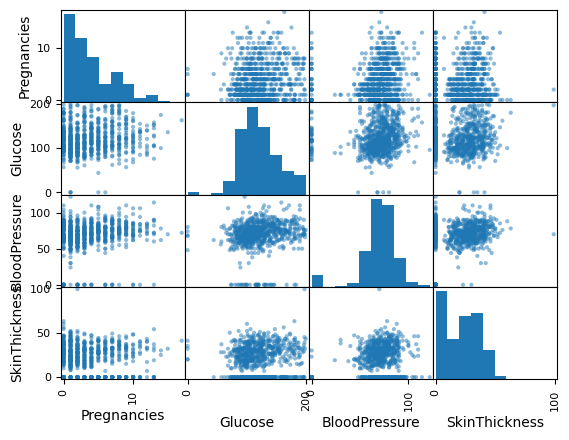

In [12]:
#If we do 1 scatter plot for 8 columns it becomes very cramped
#So I split it into 2 scatter plots
#First 4columns
df_4cols = df.iloc[:, :4]
scatter_matrix(df_4cols)
plt.show()
#The iloc method is used to extract rows and columns from thedas dataframe based on their position.

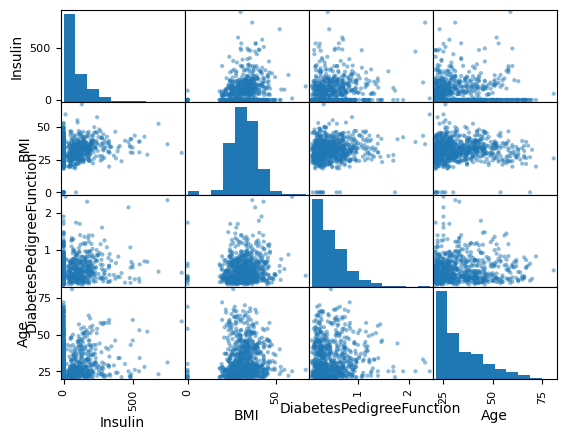

In [13]:
#Last 4 colums excluding outcome
df_last4cols = df.iloc[:, -5:-1]
scatter_matrix(df_last4cols)
plt.show()

<AxesSubplot: ylabel='Outcome'>

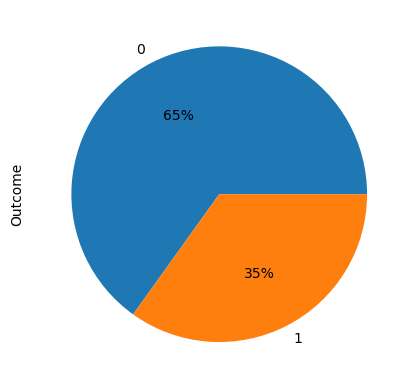

In [14]:
df['Outcome'].value_counts().plot(kind='pie',autopct='%1.0f%%') #autopct is the labelling of percentage

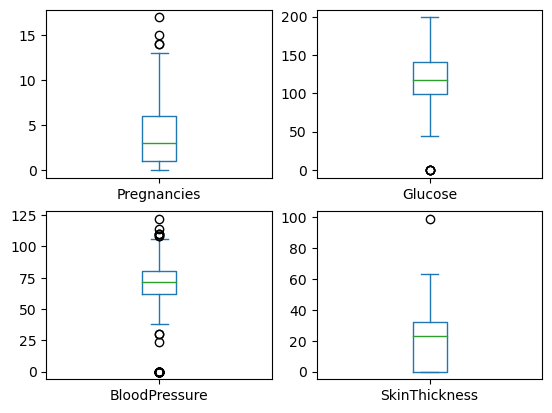

In [15]:
# box and whisker plots
df_4cols.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

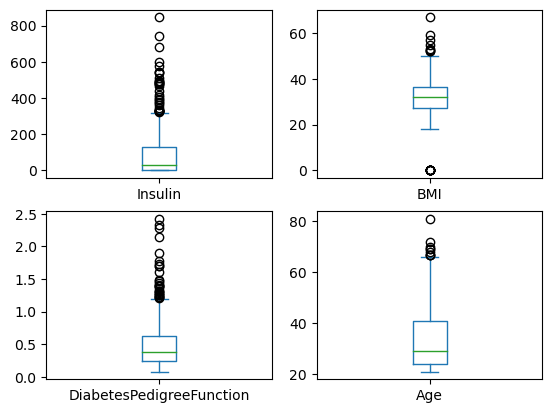

In [16]:
# box and whisker plots
df_last4cols.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

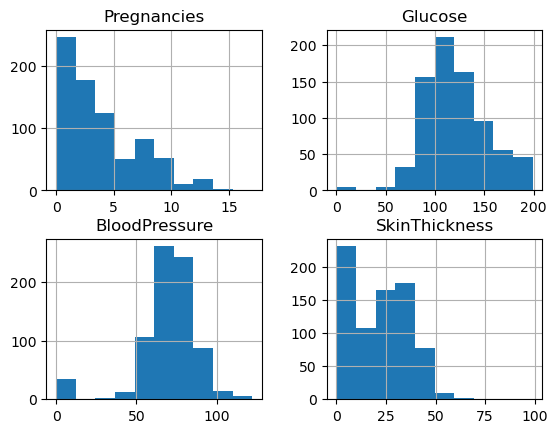

In [17]:
# histograms
df_4cols.hist()
plt.show()
#uni variate plot

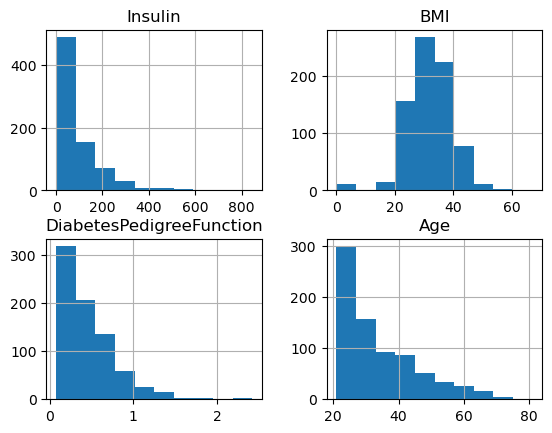

In [18]:
# histograms
df_last4cols.hist()
plt.show()
#uni variate plot

In [19]:
#Based on the above bar chart I can seee some data is skewed
#Lets check the skewness of data

# Extract a column from the DataFrame
column = df['Pregnancies']
# Calculate the skewness of the column
skewness = skew(column)
print("Pregnancies Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['Glucose']
# Calculate the skewness of the column
skewness = skew(column)
print("Glucose Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['BloodPressure']
# Calculate the skewness of the column
skewness = skew(column)
print("BloodPressure Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['SkinThickness']
# Calculate the skewness of the column
skewness = skew(column)
print("SkinThickness Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['Insulin']
# Calculate the skewness of the column
skewness = skew(column)
print("Insulin Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['BMI']
# Calculate the skewness of the column
skewness = skew(column)
print("BMI Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['DiabetesPedigreeFunction']
# Calculate the skewness of the column
skewness = skew(column)
print("DiabetesPedigreeFunction Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['Age']
# Calculate the skewness of the column
skewness = skew(column)
print("Age Skewness: ", skewness)

Pregnancies Skewness:  0.8999119408414357
Glucose Skewness:  0.17341395519987735
BloodPressure Skewness:  -1.8400052311728738
SkinThickness Skewness:  0.109158762323673
Insulin Skewness:  2.2678104585131753
BMI Skewness:  -0.42814327880861786
DiabetesPedigreeFunction Skewness:  1.9161592037386292
Age Skewness:  1.127389259531697


In [20]:
# Based on the skewness printed above I can see that I need to apply normalization to the following columns
# Insulin, DiabetesPedigreeFunctioin, Age, BloodPressure
columns_to_normalize = ["Insulin", "DiabetesPedigreeFunction", "Age", "BloodPressure"]

# Store the min and max values for each column
min_values = df[columns_to_normalize].min()
max_values = df[columns_to_normalize].max()

# Normalize each column using the min-max normalization method
for col in columns_to_normalize:
    df[col] = (df[col] - min_values[col]) / (max_values[col] - min_values[col])


# Extract a column from the DataFrame
column = df['Insulin']
# Calculate the skewness of the column
skewness = skew(column)
print("Insulin Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['DiabetesPedigreeFunction']
# Calculate the skewness of the column
skewness = skew(column)
print("DiabetesPedigreeFunction Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['Age']
# Calculate the skewness of the column
skewness = skew(column)
print("Age Skewness: ", skewness)







Insulin Skewness:  2.267810458513176
DiabetesPedigreeFunction Skewness:  1.9161592037386281
Age Skewness:  1.1273892595316963


In [21]:
# Extract the column 'BloodPressure'
column = df['BloodPressure']

# Calculate the min and max values
min_value = df['BloodPressure'].min()
max_value = df['BloodPressure'].max()

# Normalize the column
df['BloodPressure_normalized'] = (column - min_value) / (max_value - min_value)

skewness = skew(df['BloodPressure_normalized'])
print("BloodPressure Skewness: ", skewness)


BloodPressure Skewness:  -1.8400052311728732


In [22]:
#Skewness did not decrease alot lets try log transformation
# Based on the skewness printed above I can see that I need to apply log transformation to the following columns
# Insulin, DiabetesPedigreeFunctioin, Age, BloodPressure
columns_to_transform = ["Insulin", "DiabetesPedigreeFunction", "Age"]

# Apply log transformation to each column
for col in columns_to_transform:
    df[col] = np.log1p(df[col])

# Extract a column from the DataFrame
column = df['Insulin']
# Calculate the skewness of the column
skewness = skew(column)
print("Insulin Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['DiabetesPedigreeFunction']
# Calculate the skewness of the column
skewness = skew(column)
print("DiabetesPedigreeFunction Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['Age']
# Calculate the skewness of the column
skewness = skew(column)
print("Age Skewness: ", skewness)


Insulin Skewness:  1.7396869702869098
DiabetesPedigreeFunction Skewness:  1.4025561933833337
Age Skewness:  0.8526666289400912


In [23]:
import numpy as np

columns_to_transform = ["Insulin", "DiabetesPedigreeFunction", "Age"]

for col in columns_to_transform:
    df[col + "_transformed"] = np.sqrt(df[col])
    
# Extract a column from the DataFrame
column = df['Insulin_transformed']
# Calculate the skewness of the column
skewness = skew(column)
print("Insulin Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['DiabetesPedigreeFunction_transformed']
# Calculate the skewness of the column
skewness = skew(column)
print("DiabetesPedigreeFunction Skewness: ", skewness)

# Extract a column from the DataFrame
column = df['Age_transformed']
# Calculate the skewness of the column
skewness = skew(column)
print("Age Skewness: ", skewness)


Insulin Skewness:  0.49486280250274184
DiabetesPedigreeFunction Skewness:  0.4310113309987073
Age Skewness:  -0.02174946085645554


In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'BloodPressure_normalized', 'Insulin_transformed',
       'DiabetesPedigreeFunction_transformed', 'Age_transformed'],
      dtype='object')

In [25]:
df.isna().sum()

Pregnancies                             0
Glucose                                 0
BloodPressure                           0
SkinThickness                           0
Insulin                                 0
BMI                                     0
DiabetesPedigreeFunction                0
Age                                     0
Outcome                                 0
BloodPressure_normalized                0
Insulin_transformed                     0
DiabetesPedigreeFunction_transformed    0
Age_transformed                         0
dtype: int64

In [26]:
del df['BloodPressure']
del df['Age']
del df['DiabetesPedigreeFunction']
del df['Insulin']
df.to_csv('before_deleting_diabetes_outcome.csv', index=False)
y = df['Outcome'].to_numpy() #assign it to y. y is synonymous to what you are trying to predict
del df['Outcome' ] #delete Outcome column
x = df.to_numpy() #x is your input

In [27]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI',
       'BloodPressure_normalized', 'Insulin_transformed',
       'DiabetesPedigreeFunction_transformed', 'Age_transformed'],
      dtype='object')


In [28]:
df.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,BloodPressure_normalized,Insulin_transformed,DiabetesPedigreeFunction_transformed,Age_transformed
0,6,148,35,33.6,0.590164,0.000000,0.458909,0.627927
1,1,85,29,26.6,0.540984,0.000000,0.332052,0.392620
2,8,183,0,23.3,0.524590,0.000000,0.475440,0.410287
3,1,89,23,28.1,0.540984,0.324593,0.193125,0.000000
4,0,137,35,43.1,0.327869,0.425604,0.815206,0.426991
5,5,116,0,25.6,0.606557,0.000000,0.226244,0.373847
6,3,78,32,31.0,0.409836,0.314574,0.264715,0.282918
7,10,115,0,35.3,0.000000,0.000000,0.153720,0.353784
8,2,197,45,30.5,0.573770,0.704145,0.183271,0.653792
9,8,125,0,0.0,0.786885,0.000000,0.252357,0.662008


In [29]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7,random_state=0) 

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#When I did not scale the data I kept getting an error when conducting logistic regression
#Upon more research I found that logistic regression is sensitive to the scale of the features and this could be causing the error

In [31]:
# Evaluate Algorithms and set their hyperparameters (Step 5)

LR = LogisticRegression()
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB = GaussianNB()
SVM = SVC(gamma='auto')
XGB = XGBClassifier()
GB = GradientBoostingClassifier()
RF = RandomForestClassifier()

In [32]:
# Step 6 : Train the model
LR.fit(x_train,y_train)
LDA.fit(x_train,y_train)
KNN.fit(x_train,y_train)
CART.fit(x_train,y_train)
NB.fit(x_train,y_train)
SVM.fit(x_train,y_train)
GB.fit(x_train,y_train)
XGB.fit(x_train,y_train)
RF.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
#Step 7 - Evaluate the model
accuracy_score_LR = accuracy_score(y_test,LR.predict(x_test))
accuracy_score_LDA = accuracy_score(y_test,LDA.predict(x_test))
accuracy_score_KNN = accuracy_score(y_test,KNN.predict(x_test))
accuracy_score_CART = accuracy_score(y_test,CART.predict(x_test))
accuracy_score_NB = accuracy_score(y_test,NB.predict(x_test))
accuracy_score_SVM = accuracy_score(y_test,SVM.predict(x_test))
accuracy_score_GB = accuracy_score(y_test,GB.predict(x_test))
accuracy_score_XGB = accuracy_score(y_test,XGB.predict(x_test))
accuracy_score_RF = accuracy_score(y_test,RF.predict(x_test))

print('LR:',accuracy_score_LR)
print('LDA:',accuracy_score_LDA)
print('KNN:',accuracy_score_KNN)
print('CART:',accuracy_score_CART)
print('NB:',accuracy_score_NB)
print('SVM:',accuracy_score_SVM)
print('GB:',accuracy_score_GB)
print('XGB:',accuracy_score_XGB)
print('RF:',accuracy_score_RF)
#percentage where the model guess correctly

LR: 0.7619047619047619
LDA: 0.7662337662337663
KNN: 0.7748917748917749
CART: 0.7229437229437229
NB: 0.7575757575757576
SVM: 0.7445887445887446
GB: 0.7878787878787878
XGB: 0.7532467532467533
RF: 0.7792207792207793


In [34]:
param_grid = {'penalty': ["l2", "none"], 'max_iter': [100, 200, 500, 1000], "verbose": [0, 1, 2, 5]}
LR_tuned = GridSearchCV(LR, param_grid, scoring='accuracy',cv=5)
LR_tuned.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jo

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l2', 'none'], 'verbose': [0, 1, 2, 5]},
             scoring='accuracy')

In [35]:
accuracy_score_LR_tuned = accuracy_score(y_test, LR_tuned.predict(x_test))
print('LR_tuned:', accuracy_score_LR_tuned)

LR_tuned: 0.7619047619047619


In [36]:
param_grid = {'kernel': ["linear", "poly", "rbf"], 'C': [1, 2, 3, 4, 5], "degree": [1, 2, 3], "gamma":["scale", "auto"]}
SVM_tuned =GridSearchCV(SVM, param_grid, scoring='accuracy',cv=5)
SVM_tuned.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 2, 3, 4, 5], 'degree': [1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [37]:
accuracy_score_SVM_tuned = accuracy_score(y_test, SVM_tuned.predict(x_test))
print('SVM_tuned:', accuracy_score_SVM_tuned)

SVM_tuned: 0.7748917748917749


In [38]:
#Gaussian Naive Bayes has only one hyperparameter to tune
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}
NB_tuned = GridSearchCV(NB, param_grid, scoring='accuracy', cv=5)
NB_tuned.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [39]:
accuracy_score_NB_tuned = accuracy_score(y_test, NB_tuned.predict(x_test))
print('NB_tuned:', accuracy_score_NB_tuned)

NB_tuned: 0.7575757575757576


In [40]:
param_grid = {'weights': ["uniform", "distance"], 'n_neighbors': [5, 6, 7], "leaf_size": [30, 40,50], "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}
KNN_tuned =GridSearchCV(KNN, param_grid, scoring='accuracy',cv=5)
KNN_tuned.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [5, 6, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [41]:
accuracy_score_KNN_tuned = accuracy_score(y_test, KNN_tuned.predict(x_test))
print('KNN_tuned:', accuracy_score_KNN_tuned)

KNN_tuned: 0.7705627705627706


In [42]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 
              'store_covariance': [True, False]}

LDA_tuned = GridSearchCV(LDA, param_grid, scoring='accuracy', cv=5)
LDA_tuned.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'store_covariance': [True, False]},
             scoring='accuracy')

In [43]:
accuracy_score_LDA_tuned = accuracy_score(y_test, LDA_tuned.predict(x_test))
print('LDA_tuned:', accuracy_score_LDA_tuned)

LDA_tuned: 0.7662337662337663


In [44]:
parameters = {'criterion': ["gini", "entropy", "log_loss"], "splitter":["best", "random"], 'max_leaf_nodes': [50, 100, 200,500], "max_depth": [10, 30, 50, 100]}
CART_tuned =GridSearchCV(CART, parameters, scoring='accuracy',cv=5)
CART_tuned.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 30, 50, 100],
                         'max_leaf_nodes': [50, 100, 200, 500],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [45]:
accuracy_score_CART_tuned = accuracy_score(y_test, CART_tuned.predict(x_test))
print('CART_tuned:', accuracy_score_CART_tuned)

CART_tuned: 0.7575757575757576


In [46]:
param_grid = {'n_estimators': [100, 250, 500],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 4, 5],
              'subsample': [0.5, 0.8, 1.0]
             }
XGB_tuned = GridSearchCV(XGB, param_grid, scoring='accuracy',cv=5)
XGB_tuned.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 250, 500],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy')

In [47]:
accuracy_score_XGB_tuned = accuracy_score(y_test, XGB_tuned.predict(x_test))
print('XGB_tuned:', accuracy_score_XGB_tuned)

XGB_tuned: 0.7878787878787878


In [48]:
joblib.dump(XGB_tuned,"diabetes_model.pkl")

['diabetes_model.pkl']

In [49]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
RF_tuned = GridSearchCV(RF, param_grid, scoring='accuracy',cv=5)
RF_tuned.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [50]:
accuracy_score_RF_tuned = accuracy_score(y_test, RF_tuned.predict(x_test))
print('RF_tuned:', accuracy_score_RF_tuned)

RF_tuned: 0.7662337662337663


In [51]:
param_grid = {'n_estimators': [100, 250, 500],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 4, 5],
              'subsample': [0.5, 0.8, 1.0]
             }
GB_tuned = GridSearchCV(GB, param_grid, scoring='accuracy',cv=5)
GB_tuned.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 250, 500],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy')

In [52]:
accuracy_score_GB_tuned = accuracy_score(y_test, GB_tuned.predict(x_test))
print('GB_tuned:', accuracy_score_GB_tuned)

GB_tuned: 0.7575757575757576


In [53]:
#GB classifier has highest accuracy score
#Confusion matrix & classification report
print("Confusion matrix:")
print(confusion_matrix(y_test, GB.predict(x_test)))
print("Classification report:")
print(classification_report(y_test, GB.predict(x_test)))



Confusion matrix:
[[137  20]
 [ 29  45]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.69      0.61      0.65        74

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231



In [54]:
feature_labels = np.array(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'BloodPressure_normalized', 'Insulin_transformed', 'DiabetesPedigreeFunction_transformed', 'Age_transformed'])
# Create a numpy array based on the model's feature importances
best_model = XGB_tuned.best_estimator_
importance = best_model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from least important to most important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))


BloodPressure_normalized - 9.55%
Pregnancies - 9.62%
SkinThickness - 10.19%
Insulin_transformed - 10.81%
DiabetesPedigreeFunction_transformed - 11.25%
Age_transformed - 13.38%
BMI - 14.62%
Glucose - 20.59%


In [55]:
# Load the CSV file into a Pandas DataFrame
df_2 = pd.read_csv('before_deleting_diabetes_outcome.csv')
df_2.head(10)


,Pregnancies,Glucose,SkinThickness,BMI,Outcome,BloodPressure_normalized,Insulin_transformed,DiabetesPedigreeFunction_transformed,Age_transformed
0,6,148,35,33.6,1,0.590164,0.000000,0.458909,0.627927
1,1,85,29,26.6,0,0.540984,0.000000,0.332052,0.392620
2,8,183,0,23.3,1,0.524590,0.000000,0.475440,0.410287
3,1,89,23,28.1,0,0.540984,0.324593,0.193125,0.000000
4,0,137,35,43.1,1,0.327869,0.425604,0.815206,0.426991
5,5,116,0,25.6,0,0.606557,0.000000,0.226244,0.373847
6,3,78,32,31.0,1,0.409836,0.314574,0.264715,0.282918
7,10,115,0,35.3,0,0.000000,0.000000,0.153720,0.353784
8,2,197,45,30.5,1,0.573770,0.704145,0.183271,0.653792
9,8,125,0,0.0,1,0.786885,0.000000,0.252357,0.662008


In [56]:
del df_2['BloodPressure_normalized'] #<10%
del df_2['Pregnancies']
y2 = df_2['Outcome'].to_numpy() #assign it to y. y is synonymous to what you are trying to predict
del df_2['Outcome' ] #delete Outcome column
x2 = df_2.to_numpy() #x is your input

In [57]:
x_train2, x_test2, y_train2, y_test2 = model_selection.train_test_split(x2, y2, train_size=0.7,random_state=0) 

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [59]:
XGB_tuned.fit(x_train2,y_train2)
accuracy_score_XGB_tuned = accuracy_score(y_test2,XGB_tuned.predict(x_test2))
print('XGB_tuned:',accuracy_score_XGB_tuned)

XGB_tuned: 0.7748917748917749


In [60]:
joblib.dump(XGB_tuned,"diabetes_model2.pkl")

['diabetes_model2.pkl']

In [61]:
# Load the CSV file into a Pandas DataFrame
df_3 = pd.read_csv('before_deleting_diabetes_outcome.csv')
df_3.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,Outcome,BloodPressure_normalized,Insulin_transformed,DiabetesPedigreeFunction_transformed,Age_transformed
0,6,148,35,33.6,1,0.590164,0.000000,0.458909,0.627927
1,1,85,29,26.6,0,0.540984,0.000000,0.332052,0.392620
2,8,183,0,23.3,1,0.524590,0.000000,0.475440,0.410287
3,1,89,23,28.1,0,0.540984,0.324593,0.193125,0.000000
4,0,137,35,43.1,1,0.327869,0.425604,0.815206,0.426991
5,5,116,0,25.6,0,0.606557,0.000000,0.226244,0.373847
6,3,78,32,31.0,1,0.409836,0.314574,0.264715,0.282918
7,10,115,0,35.3,0,0.000000,0.000000,0.153720,0.353784
8,2,197,45,30.5,1,0.573770,0.704145,0.183271,0.653792
9,8,125,0,0.0,1,0.786885,0.000000,0.252357,0.662008


In [62]:
del df_3['BloodPressure_normalized'] #<10%, I try removing 1 column only instead of 2
y3 = df_3['Outcome'].to_numpy() #assign it to y. y is synonymous to what you are trying to predict
del df_3['Outcome' ] #delete Outcome column
x3 = df_3.to_numpy() #x is your input

In [63]:
x_train3, x_test3, y_train3, y_test3 = model_selection.train_test_split(x3, y3, train_size=0.7,random_state=0) 

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)

In [65]:
XGB_tuned.fit(x_train3,y_train3)
accuracy_score_XGB_tuned = accuracy_score(y_test3,XGB_tuned.predict(x_test3))
print('XGB_tuned:',accuracy_score_XGB_tuned)

XGB_tuned: 0.8008658008658008


In [66]:
joblib.dump(XGB_tuned,"diabetes_model3.pkl")

['diabetes_model3.pkl']

In [67]:
# Load the CSV file into a Pandas DataFrame
df_4 = pd.read_csv('before_deleting_diabetes_outcome.csv')
df_4.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,Outcome,BloodPressure_normalized,Insulin_transformed,DiabetesPedigreeFunction_transformed,Age_transformed
0,6,148,35,33.6,1,0.590164,0.000000,0.458909,0.627927
1,1,85,29,26.6,0,0.540984,0.000000,0.332052,0.392620
2,8,183,0,23.3,1,0.524590,0.000000,0.475440,0.410287
3,1,89,23,28.1,0,0.540984,0.324593,0.193125,0.000000
4,0,137,35,43.1,1,0.327869,0.425604,0.815206,0.426991
5,5,116,0,25.6,0,0.606557,0.000000,0.226244,0.373847
6,3,78,32,31.0,1,0.409836,0.314574,0.264715,0.282918
7,10,115,0,35.3,0,0.000000,0.000000,0.153720,0.353784
8,2,197,45,30.5,1,0.573770,0.704145,0.183271,0.653792
9,8,125,0,0.0,1,0.786885,0.000000,0.252357,0.662008


In [68]:
del df_4['Pregnancies'] #<10%, I try removing 1 column only instead of 2
y4 = df_4['Outcome'].to_numpy() #assign it to y. y is synonymous to what you are trying to predict
del df_4['Outcome' ] #delete Outcome column
x4 = df_4.to_numpy() #x is your input

In [69]:
x_train4, x_test4, y_train4, y_test4 = model_selection.train_test_split(x4, y4, train_size=0.7,random_state=0) 

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train4 = scaler.fit_transform(x_train4)
x_test4 = scaler.transform(x_test4)

In [71]:
XGB_tuned.fit(x_train4,y_train4)
accuracy_score_XGB_tuned = accuracy_score(y_test4,XGB_tuned.predict(x_test4))
print('XGB_tuned:',accuracy_score_XGB_tuned)

XGB_tuned: 0.7835497835497836


In [72]:
print(XGB_tuned.predict([[7,122,1,1,0.252357,0.662008,10]]))

[1]
